# Perceptron

Perceptron 最初由 Frank Rosenblatt 在 Cornell Aeronautical Laboratory 于 1957 年被发明。最初的想法是构建一台物理上实际存在的机器，而不是一个程序。 Perceptron 第一次在 IBM 704 机器上实现。然后他们设计了一个可以进行图像识别的物理机器，使用“连接主义”的思想，将输入图像和多个 Perceptron 的输入接口随机相连，得到最后输出的编码。

从一个最简单的情况开始。有一个数据集 $X = \{(x_1, y_1, label_1), (x_2, y_2, label_2), (x_3, y_3, label_3) ... (x_n, y_n, label_n)\}$，这个数据集中的点画在坐标系上，从视觉上可以明显发现是分成两部分的。这个问题在很小时候的，数学告诉我们，如果有一个根直线 $y=\theta x+b$，在这个直线上的点，都会满足 $\theta x + b - y = 0$，不在直线上的点，其 $x, y$ 代入直线的公式后计算得到的  $f(x, y)$ 要么大于 0，要么小于 0。计算得到的 $f(x, y)$ 和 真实的 Label 的符号应该是一致的，最少也有 $f(x, y) = 0$。 Perceptron 的 Loss 函数就可以直接写成: $Loss(label, f(x, y)) = -1 \times I(label * f(x, y) < 0) f(x, y)$。有了 Loss 函数，就可以使用 Stochastic Graident Descent 计算出参数值，其对应的 Graident 是：

$\frac{\partial}{\partial \theta}Loss(label, f(x, y)) = x$ 以及 $\frac{\partial}{\partial b}Loss(label, f(x, y)) = 1$ 

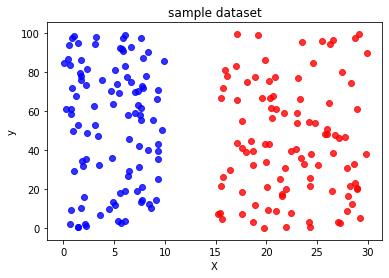

In [1]:
# create sample dataset

import numpy as np
import matplotlib.pyplot as plt

left_x = np.random.uniform(15, 30, 100)
left_y = np.random.uniform(0, 100, 100)

right_x = np.random.uniform(0, 10, 100)
right_y = np.random.uniform(0, 100, 100)

plt.scatter(left_x, left_y, alpha=0.8, c='red')
plt.scatter(right_x, right_y, alpha=0.8, c='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('sample dataset')
plt.show()
plt.close()

p = np.c_[left_x, left_y]
n = np.c_[right_x, right_y]

X = np.r_[p, n]
y = np.r_[np.ones(100), -1 * np.ones(100)]

In [ ]:
# numpy

theta = np.random.randn(X.shape[1], 1)
b = np.random.randn(1, 1)
LEARNING_RATE = 1e-5

EPOCH = 1000
PRINT_STEP = EPOCH / 100
ERROR_POINT = 0

DATASET_SIZE = X.shape[0]

for epoch in range(EPOCH):
    ERROR_POINT = 0
    for index in range(DATASET_SIZE):
        sample_x = X[index]
        sample_y = y[index]



        y_pred = np.dot(theta.T, sample_x) + b
        if sample_y * y_pred < 0:
            theta -= -1 * LEARNING_RATE * sample_y * sample_x
            b -= -1 * LEARNING_RATE * sample_y
            ERROR_POINT += 1

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, Error Points: %d' % (epoch, ERROR_POINT))

    if ERROR_POINT == 0:
        print('Last EPOCH: %d' % (epoch))
        break

print('theta: %f, b: %f' % (theta, b))